Figure-SI3.ipynb
------------------------------------------------------------------------------
Purpose:  
- Generate Figure SI3 (panels A - D) illustrating data quality across countries. 

Usage:
- Change fp variable to replication filepath.
- Run all cells.
  
Requirements:
- Python 3
- Packages: matplotlib 3.9.2, pandas 2.2.2, numpy 1.26.4

Inputs:
- sample_nonus/{table_type}_{country}.csv, for:
  - table_type in ['pings_per_day','pings_per_trip','trips_per_day','ping_time']
  - country in ['NG','MX','IN','ID']
  - produced on Spectus platform using process_trips_into_outputs_intl.ipynb

Outputs:
- figures/figSI3.png


In [1]:
fp = '../'
fp_input = fp + 'data/'
fp_output = fp + 'figures/'


In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Read in data & create figure.

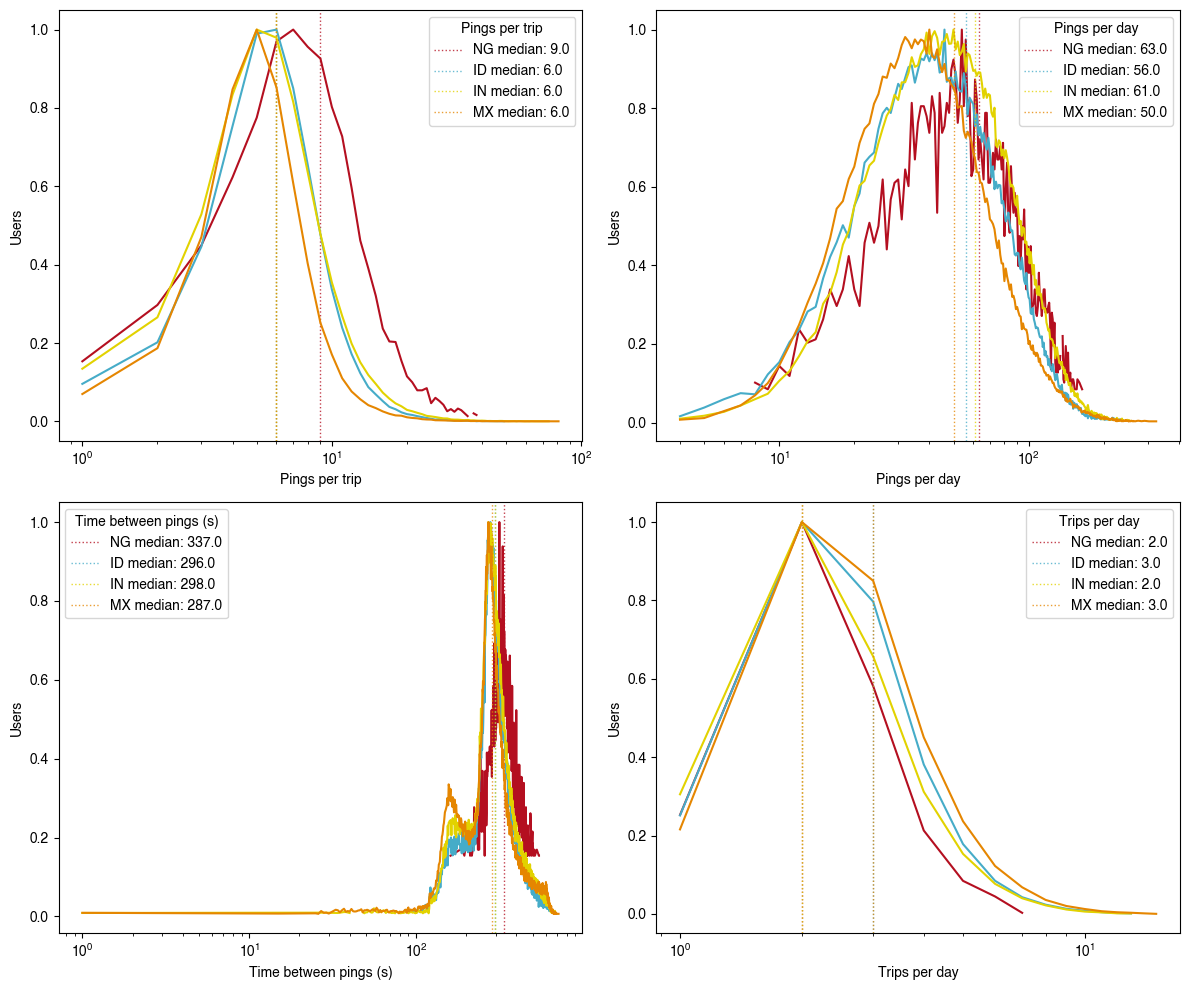

In [5]:
colors = {'ID': '#46ACC8',
            'IN': '#e2d200',
            'MX': '#E58601',
            'NG': '#B40F20'}

darkcolors = {'ID': '#0A81A1',
              'IN': '#A79B00',
              'MX': '#AF6703',
              'NG': '#920513' 
            }

labels = ['A','B','C','D']
countries = ['NG','ID','IN','MX']
countries_readable = {'NG':'Nigeria','ID':'Indonesia','IN':'India','MX':'Mexico'}

fig,axs = plt.subplots(2,2,figsize=(12,10))
mpl.rcParams['font.family'] = 'Helvetica'

mo_counts = []
i=0
for country in countries:




    for triplet in [(0,'pings_per_trip','Pings per trip'),
                    (1,'pings_per_day','Pings per day'),
                    (2,'ping_time','Time between pings (s)'),
                    (3,'trips_per_day','Trips per day')]:
        q = triplet[0]
        df_name = triplet[1]
        col = triplet[1]
        readable = triplet[2]
        
        df = pd.read_csv(f'{fp_input}sample_statistics/sample_nonus/{df_name}_{country}.csv')
        df.columns = df.columns.str.lower()
        df = df.pivot(columns={'filter'},index=col,values='users').rename(columns={k:f'users{k}' for k in range(1,5)}).reset_index()
        for c in ['users1','users2','users3','users4']:
            if c not in df.columns:
                df[c] = np.nan
                
        if df_name == 'trips_per_day':
            df['trips_per_day_rdd'] = np.ceil(df.trips_per_day)
            df = df.groupby('trips_per_day_rdd').agg({f'users{i}':'sum' for i in range(1,5)}).reset_index()
            col = 'trips_per_day_rdd'
            
        
            

    
        df = df.sort_values(col)
        df['users_cumul'] = df.users1.cumsum()/df.users1.sum()
        med = df[df.users_cumul>.5][col].values[0]
        q90=df[df.users_cumul>.90][col].values[0]
        q75=df[df.users_cumul>.75][col].values[0]
        q25=df[df.users_cumul>.25][col].values[0]
        q10=df[df.users_cumul>.1][col].values[0]
        axs[q//2,q%2].axvline(med, label=f'{country} median: {np.round(med, 2):.1f}', color=colors[country], alpha=.8, linestyle='dotted',linewidth=1)
        axs[q//2,q%2].plot(df[col],df.users1/df.users1.max(),color=colors[country])
        axs[q//2,q%2].set_ylabel('Users')
        axs[q//2,q%2].set_xlabel(readable)
        axs[q//2,q%2].legend(title=readable)
        axs[q//2,q%2].set_xscale('log')

    fig.tight_layout()
    i+=1

fig.tight_layout()
fig.savefig(f'{fp_output}figSI3.png')
